# Challenge 1

*País seleccionado: Canada*

##### Importamos la base de datos de países

In [6]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [7]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [8]:
countries.shape

(252, 2)

In [9]:
# Buscamos NAs
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [11]:
# Chequeamos la info de la bd
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

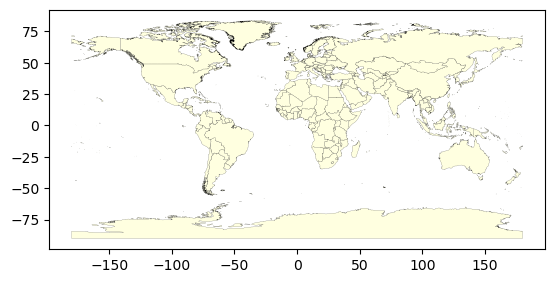

In [18]:
# Vemos el mapa de todos los países
countries.plot(facecolor="lightyellow",#este de acá es el relleno
               edgecolor='black', #este de acá las líneas
               linewidth=0.1) #grosor de las líneas

##### Importamos las demás bases de datos 
*(rivers and cities)*

In [19]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

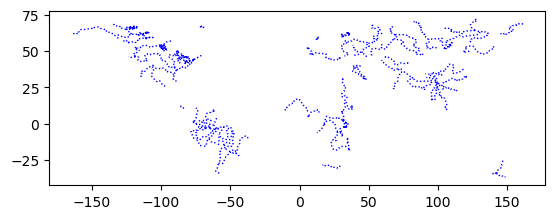

In [23]:
#Mapa de rios
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

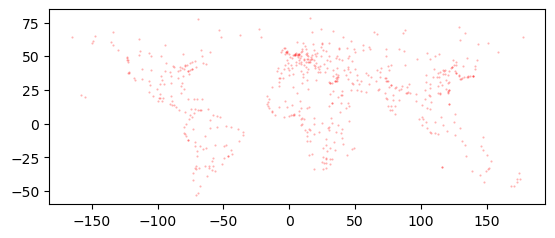

In [25]:
#Mapa de ciudades
cities.plot(marker='.', #tipo de marcador
            color='red',
            markersize=1,
            alpha=0.3) #transparencia

##### Verificamos la proyección
*Esto para ver si es posible unir los mapas*

In [27]:
countries.crs==cities.crs==cities.crs

True

In [28]:
countries.crs==rivers.crs==rivers.crs

True

##### *Hacemos mapita de todo*

<Axes: >

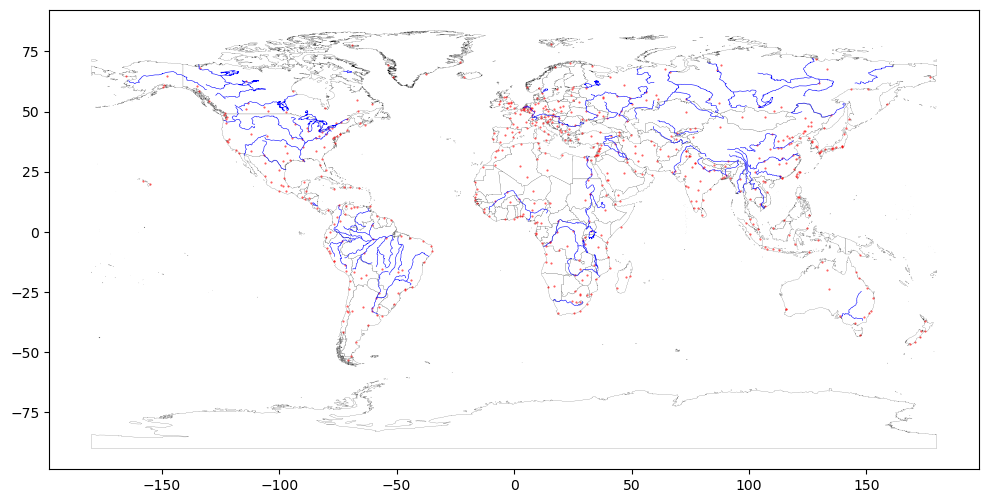

In [29]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base)

In [31]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

#### *Ahora con Canada...*

In [41]:
#Hacemos como un 'subest'
canada=countries[countries.COUNTRY=='Canada']

In [42]:
#También hacemos 'clipping' para asegurarnos
citiesCanada_clipped = gpd.clip(gdf=cities,
                          mask=canada)
riversCanada_clipped = gpd.clip(gdf=rivers,
                               mask=canada)

<Axes: >

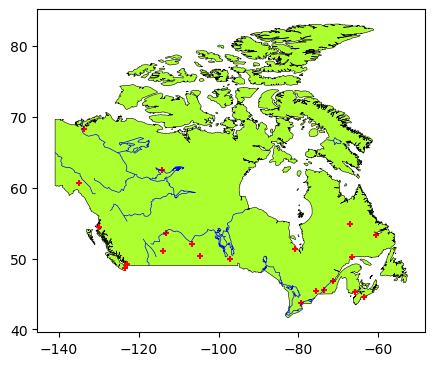

In [43]:
#Ploteamos...
base = canada.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesCanada_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversCanada_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [45]:
#comprobamos...
canada.geom_type

35    MultiPolygon
dtype: object

In [46]:
citiesCanada_clipped.geom_type

434    Point
462    Point
76     Point
73     Point
86     Point
372    Point
579    Point
50     Point
332    Point
40     Point
335    Point
331    Point
507    Point
461    Point
69     Point
469    Point
337    Point
336    Point
396    Point
592    Point
438    Point
dtype: object

In [47]:
riversCanada_clipped.geom_type

47    MultiLineString
32    MultiLineString
77    MultiLineString
76    MultiLineString
12    MultiLineString
50    MultiLineString
16    MultiLineString
89    MultiLineString
72    MultiLineString
45    MultiLineString
57    MultiLineString
74    MultiLineString
95         LineString
36    MultiLineString
23    MultiLineString
dtype: object

##### Proyección del mapa de Canada

In [51]:
print(canada.crs) #CRS predeterminado es 4326

EPSG:4326


In [49]:
canada.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Debido a que está en longitud y latitud, podemos evitar buscar el centroide.
Por ello, debemos **reproyectar** el mapa: 

In [53]:
canada.to_crs(3347).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [54]:
#a ver si funciona...
canada.to_crs(3347).centroid

35    POINT (5972149.89 2686372.792)
dtype: geometry

*Reploteamos...*

<Axes: >

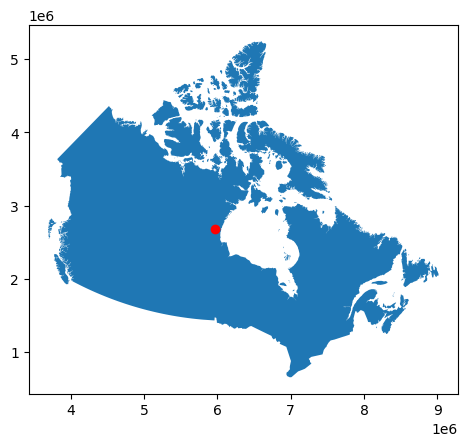

In [56]:
base3347=canada.to_crs(3347).plot()
canada.to_crs(3347).centroid.plot(color='red',ax=base3347)

In [58]:
#guardamos los mapitas
canada_3347=canada.to_crs(3347)
cities_canada_3347=citiesCanada_clipped.to_crs(canada_3347.crs)
rivers_canada_3347=riversCanada_clipped.to_crs(canada_3347.crs)

In [60]:
#seguimos guardando...
import os

canada_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='country', driver="GPKG")
cities_canada_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='cities', driver="GPKG")
rivers_canada_3347.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='rivers', driver="GPKG")

In [61]:
print(canada_3347.crs)

EPSG:3347


In [62]:
canada_3347.centroid.to_file(os.path.join("maps","canadaMaps_3347.gpkg"), layer='centroid', driver="GPKG")

#### Creamos la data espacial...

In [64]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("airports","ca-airports.csv"))
#Vemos la info
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] 

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,1990,CYYZ,large_airport,Toronto Lester B. Pearson International Airport,43.6772,-79.6306,569,NaN,Canada,CA,...,Toronto,1,CYYZ,YYZ,YYZ,http://www.gtaa.com/,https://en.wikipedia.org/wiki/Toronto_Pearson_...,"YTO, Toronto International Airport, Malton",1040275,2024-04-02T16:48:43+00:00
2,1941,CYVR,large_airport,Vancouver International Airport,49.193901062,-123.183998108,14,NaN,Canada,CA,...,Vancouver,1,CYVR,YVR,NaN,http://www.yvr.ca/,https://en.wikipedia.org/wiki/Vancouver_Intern...,NaN,1018875,2013-07-22T11:09:16+00:00
3,1928,CYUL,large_airport,Montreal / Pierre Elliott Trudeau Internationa...,45.467837,-73.742294,118,NaN,Canada,CA,...,Montréal,1,CYUL,YUL,YUL,http://www.admtl.com/passager/Home.aspx,https://en.wikipedia.org/wiki/Montr%C3%A9al-Pi...,"YMQ, Dorval Airport",51875,2024-04-02T16:47:08+00:00
3123,320714,CA-0659,closed,Yahk Aerodrome,49.109,-116.0598,2870,NaN,Canada,CA,...,Yahk,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-23T12:47:24+00:00
3124,39705,CA-0059,closed,Brazeau Airport,52.967817,-115.86737,NaN,NaN,Canada,CA,...,Yellowhead,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-02-18T17:19:40+00:00
3125,40067,CA-0421,closed,E C Air Airport,51.53614,-111.19324,NaN,NaN,Canada,CA,...,Youngstown,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-12-03T06:44:57+00:00
3126,40068,CA-0422,closed,Yoyo Airport,58.9258,-121.473201,1950,NaN,Canada,CA,...,Yoyo,0,NaN,NaN,NaN,NaN,NaN,"BL8, BL8",0,2016-09-10T06:55:25+00:00


*Tenemos que borrar la primera línea, no contiene datos que nos sean relevantes...*

In [65]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,1990,CYYZ,large_airport,Toronto Lester B. Pearson International Airport,43.6772,-79.6306,569,NaN,Canada,CA,...,Toronto,1,CYYZ,YYZ,YYZ,http://www.gtaa.com/,https://en.wikipedia.org/wiki/Toronto_Pearson_...,"YTO, Toronto International Airport, Malton",1040275,2024-04-02T16:48:43+00:00
1,1941,CYVR,large_airport,Vancouver International Airport,49.193901062,-123.183998108,14,NaN,Canada,CA,...,Vancouver,1,CYVR,YVR,NaN,http://www.yvr.ca/,https://en.wikipedia.org/wiki/Vancouver_Intern...,NaN,1018875,2013-07-22T11:09:16+00:00
2,1928,CYUL,large_airport,Montreal / Pierre Elliott Trudeau Internationa...,45.467837,-73.742294,118,NaN,Canada,CA,...,Montréal,1,CYUL,YUL,YUL,http://www.admtl.com/passager/Home.aspx,https://en.wikipedia.org/wiki/Montr%C3%A9al-Pi...,"YMQ, Dorval Airport",51875,2024-04-02T16:47:08+00:00
3,1973,CYYC,large_airport,Calgary International Airport,51.118822,-114.009933,3557,NaN,Canada,CA,...,Calgary,1,CYYC,YYC,NaN,http://www.calgaryairport.com/,https://en.wikipedia.org/wiki/Calgary_Internat...,McCall Field,51275,2024-04-02T16:47:55+00:00
4,1840,CYOW,large_airport,Ottawa Macdonald-Cartier International Airport,45.322498,-75.669197,374,NaN,Canada,CA,...,Ottawa,1,CYOW,YOW,YOW,https://yow.ca/,https://en.wikipedia.org/wiki/Ottawa_Macdonald...,"Uplands, UUP, CUUP",1275,2022-11-06T16:37:56+00:00


*Ahora sí!* 
Nos quedamos solo con las columnas que **necesitamos**

In [66]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [68]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3126 non-null   object
 1   type           3126 non-null   object
 2   latitude_deg   3126 non-null   object
 3   longitude_deg  3126 non-null   object
 4   elevation_ft   2608 non-null   object
 5   region_name    3126 non-null   object
 6   municipality   2603 non-null   object
dtypes: object(7)
memory usage: 171.1+ KB


*Formateamos*

In [69]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3126 non-null   object 
 1   type           3126 non-null   object 
 2   latitude_deg   3126 non-null   float64
 3   longitude_deg  3126 non-null   float64
 4   elevation_ft   2608 non-null   float64
 5   region_name    3126 non-null   object 
 6   municipality   2603 non-null   object 
dtypes: float64(3), object(4)
memory usage: 171.1+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

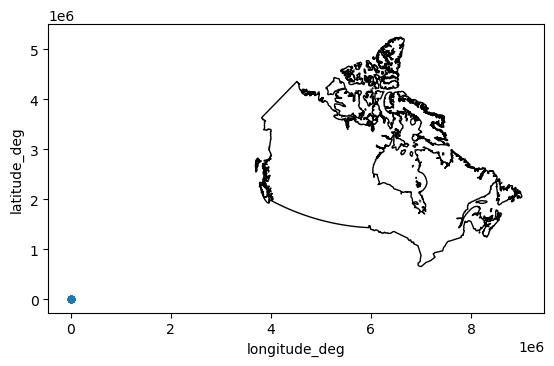

In [70]:
#Ploteamos
base = canada_3347.plot(color='white', edgecolor='black') #sin proyectar

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Ok... Esto está mal, ahora debemos arreglarlo

In [72]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=canada.crs.to_epsg())

<Axes: >

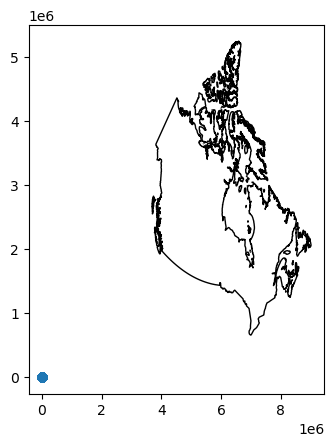

In [73]:
#Intentamos plotear de nuevo
base = canada_3347.plot(color='white', edgecolor='black')
airports.plot(ax=base)

Con esto nos damos cuenta que **no se está proyectando**

In [74]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [80]:
canada_3347 = canada.to_crs(epsg=3347)

<Axes: >

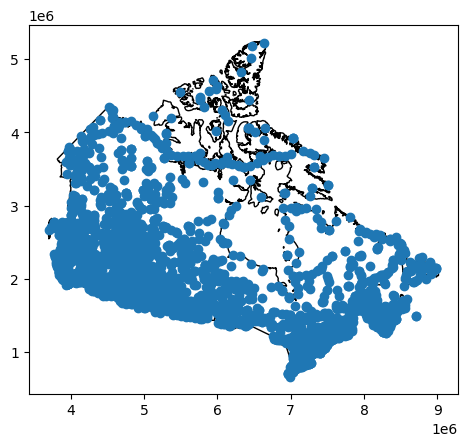

In [83]:
airports_3347=airports.to_crs(3347)

base = canada_3347.plot(color='white', edgecolor='black')
airports_3347.plot(ax=base)

Le damos un poquito más de formato :)

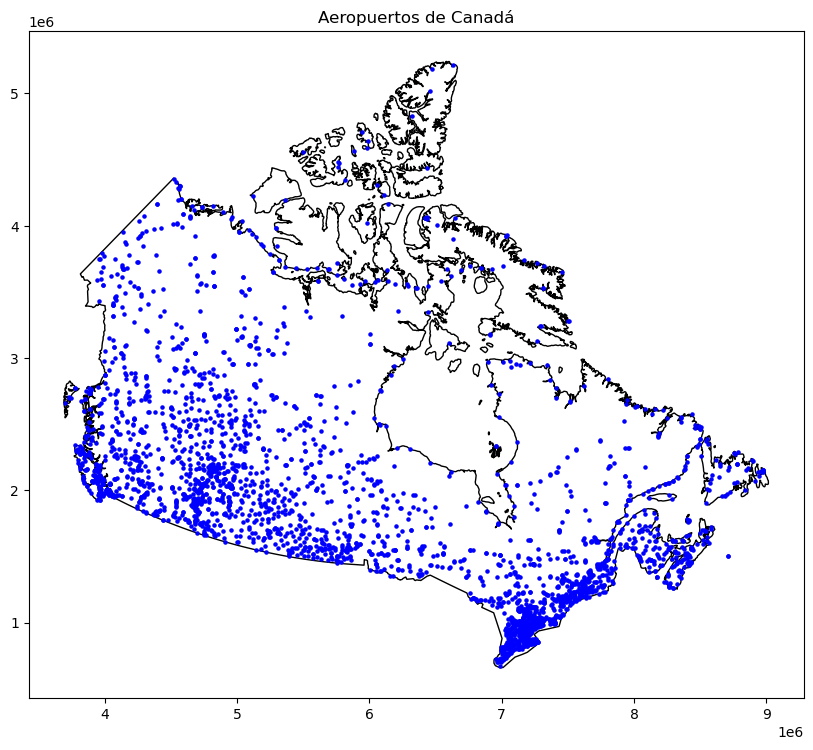

In [121]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
canada_3347.plot(ax=ax, color='white', edgecolor='black') #Esto es para el contorno
airports_3347.plot(ax=ax, marker='o', color='blue', markersize=5) #Insertamos los aeropuertos
plt.title('Aeropuertos de Canadá')
plt.show()

##### Ahora insertamos los ríos y ciudades

<Axes: >

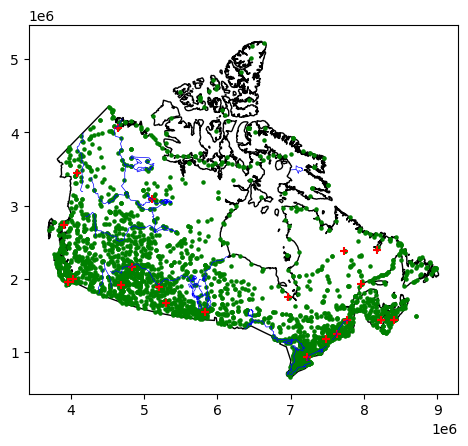

In [87]:
base = canada_3347.plot(color='white', edgecolor='black')

airports_3347.plot(ax=base, color='green', markersize=5)

cities_canada_3347.plot(marker='+', color='red', markersize=30, ax=base)

rivers_canada_3347.plot(edgecolor='blue', linewidth=0.5, ax=base)

*Jugamos un poquito de nuevo con el formato del mapa*

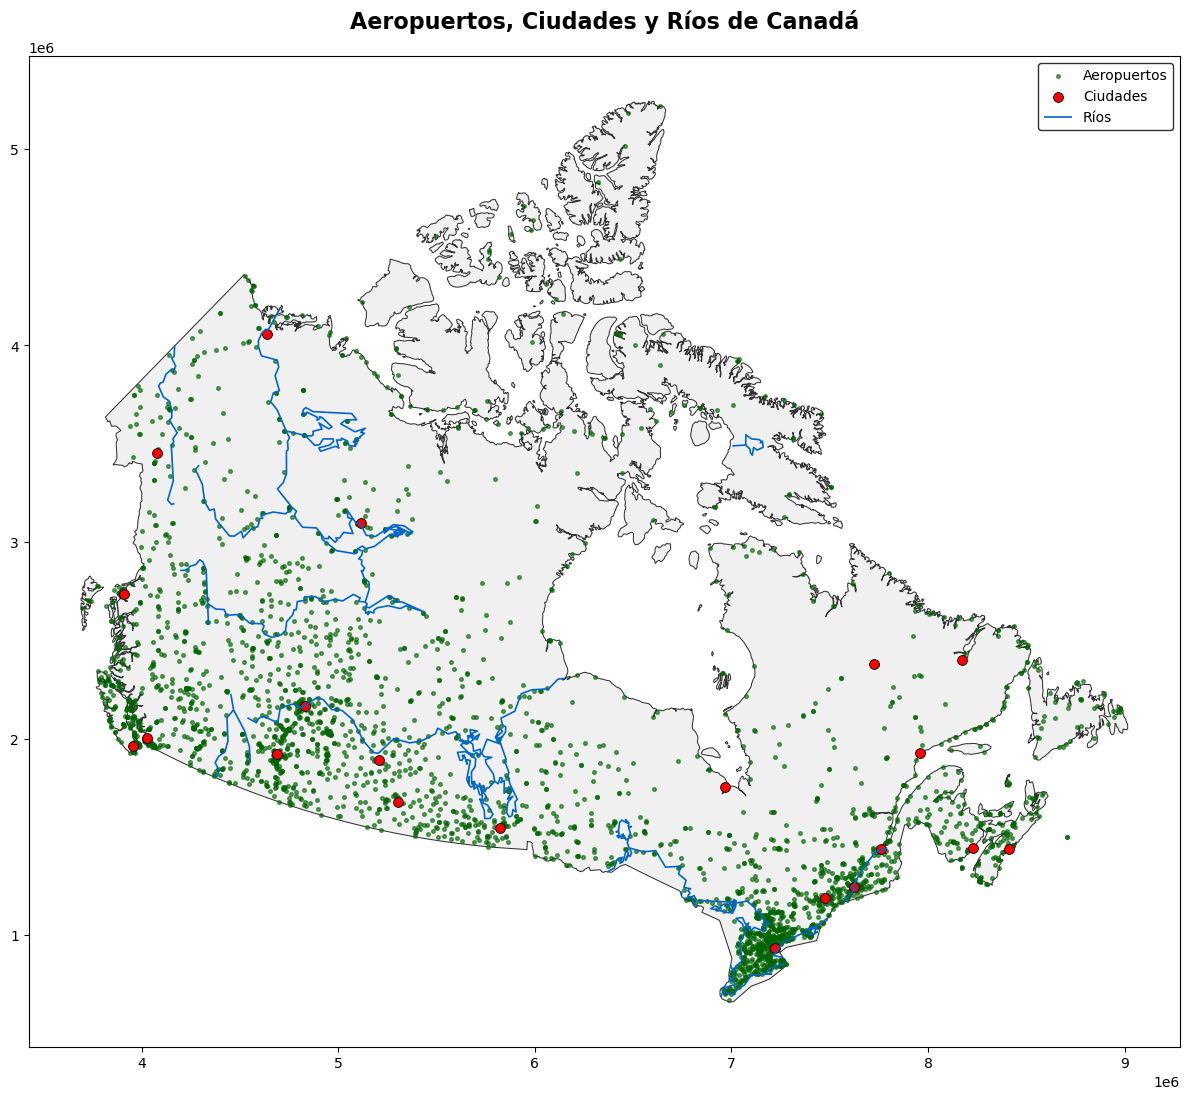

In [101]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(12, 12))
canada_3347.plot(ax=ax, color='#f0f0f0', edgecolor='#333333', linewidth=0.75, label='Límites de Canadá') #Contorno del país
airports_3347.plot(ax=ax, color='#006400', marker='o', markersize=7, alpha=0.6, label='Aeropuertos') #Insertamos aeropuerto
cities_canada_3347.plot(ax=ax, marker='o', color='red', markersize=50, edgecolor='black', linewidth=0.6, label='Ciudades') #Ponemos las ciudades
rivers_canada_3347.plot(ax=ax, color='#0066cc', linewidth=1.2, label='Ríos') #Configuramos el grosor de los ríos
plt.title('Aeropuertos, Ciudades y Ríos de Canadá', fontsize=16, fontweight='bold', pad=20) #Título para saber de qué es el mapa


# Añadir una leyenda
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black', fontsize=10)
plt.tight_layout()
plt.show()

##### *Y si añadimos más cosas?*

In [112]:
import requests

url = "https://raw.githubusercontent.com/wisdomtheif/Canadian_GeoJSON/master/canada_provinces.geojson"
response = requests.get(url)

# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    with open("canada_provinces.geojson", "wb") as f:
        f.write(response.content)
    print("Archivo descargado con éxito.")
else:
    print("Error al descargar el archivo:", response.status_code)

Archivo descargado con éxito.


In [114]:
inside_canada = gpd.read_file("canada_provinces.geojson")
print(gdf.head())

                       NAME  CODE  \
0                   Alberta  CA01   
1              Saskatchewan  CA11   
2                  Manitoba  CA03   
3  Newfoundland  & Labrador  CA05   
4      Prince Edward Island  CA09   

                                            geometry  
0  POLYGON ((-114.11106 48.99497, -114.0961 49.01...  
1  POLYGON ((-110 50, -110 51, -110 52, -110 53, ...  
2  MULTIPOLYGON (((-94.72171 59.08031, -94.73962 ...  
3  MULTIPOLYGON (((-53.07114 49.70141, -53.0922 4...  
4  POLYGON ((-62.85124 45.97591, -62.92094 45.980...  


In [116]:
inside_canada_3347 =inside_canada.to_crs(3347)

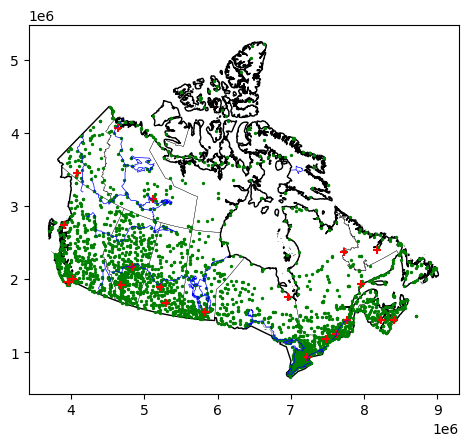

In [118]:
base = canada_3347.plot(color='white', edgecolor='black')

inside_canada_3347.plot(facecolor='none', edgecolor='black', linewidth=0.2, ax=base)

airports_3347.plot(ax=base, color='green', markersize=2)

cities_canada_3347.plot(marker='+', color='red', markersize=40, ax=base)

rivers_canada_3347.plot(edgecolor='blue', linewidth=0.5, ax=base)

plt.show()

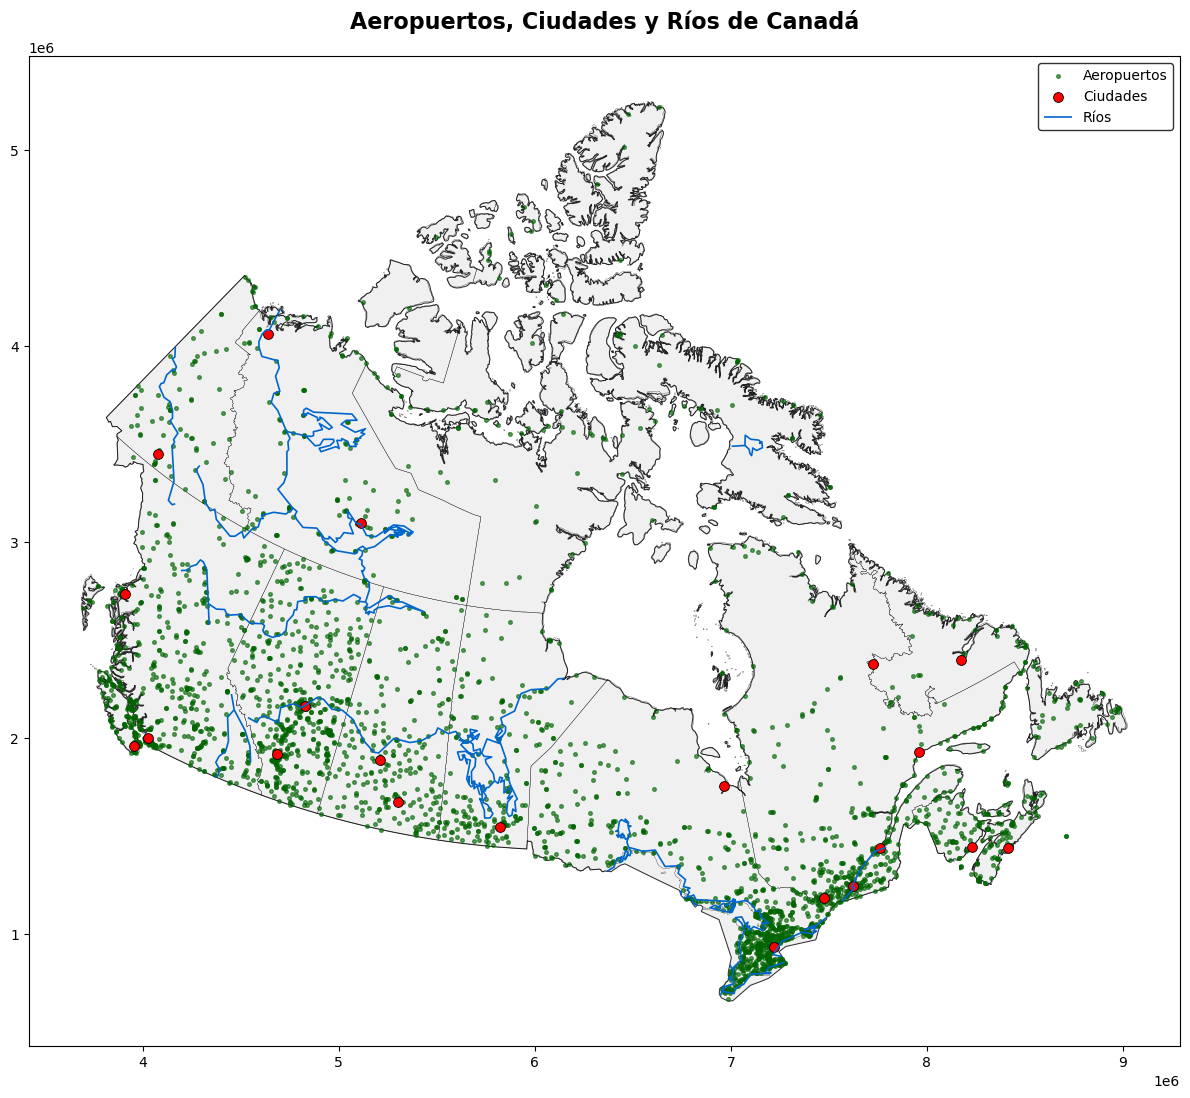

In [120]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(12, 12))
canada_3347.plot(ax=ax, color='#f0f0f0', edgecolor='#333333', linewidth=0.75, label='Límites de Canadá') #Contorno del país
inside_canada_3347.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.2, label='Regiones internas') #Regiones del país
airports_3347.plot(ax=ax, color='#006400', marker='o', markersize=7, alpha=0.6, label='Aeropuertos') #Insertamos aeropuerto
cities_canada_3347.plot(ax=ax, marker='o', color='red', markersize=50, edgecolor='black', linewidth=0.6, label='Ciudades') #Ponemos las ciudades
rivers_canada_3347.plot(ax=ax, color='#0066cc', linewidth=1.2, label='Ríos') #Configuramos el grosor de los ríos
plt.title('Aeropuertos, Ciudades y Ríos de Canadá', fontsize=16, fontweight='bold', pad=20) #Título para saber de qué es el mapa

# Añadir leyenda
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black', fontsize=10)
plt.tight_layout()
plt.show()